In [2]:
import pandas as pd
import numpy as np
import networkx as nx # to work with graphs
import matplotlib.pyplot as plt

file_path = 'task 1 .xlsx'  
all_sheets = pd.read_excel(file_path, sheet_name=None)

# Dataframe obtained from each sheet in the Excel file
for sheet_name, data in all_sheets.items():
    print(f"Data from sheet: {sheet_name}")


Data from sheet: FirstHalf
Data from sheet: SecondHalf
Data from sheet: Metrics_First_Half
Data from sheet: Metrics_Second_Half
Data from sheet: Sheet5


In [3]:
FirstHalf = all_sheets['FirstHalf']  
print(FirstHalf)

   Unnamed: 0  Player 1  Player 2  Player 3  Player 4  Player 5  Player 6  \
0    Player 1         0         1         4         7         1         1   
1    Player 2         1         0         2         0         4         0   
2    Player 3         3         5         0         6         7         0   
3    Player 4         3         1         7         0         6         2   
4    Player 5         1         3         4         6         0         1   
5    Player 6         1         1         0         6         0         0   
6    Player 7         0         4         2         1         3         3   
7    Player 8         1         2         3         4         7         0   
8    Player 9         0         0         0         0         1         0   
9   Player 10         0         3         3         2         3         2   
10  Player 11         0         2         1         0         1         0   

    Player 7  Player 8  Player 9  Player 10  Player 11  
0          0      

Social Network Analysis:

 is a methodological approach that examines the relationships and interactions within a football team. It utilizes graph theory to represent players as nodes and passes between them as edges

In [4]:
G = nx.DiGraph()
players = FirstHalf.columns[1:]  
for i in players:
    G.add_node(i) 

for i, row in FirstHalf.iterrows():
    sender = row['Unnamed: 0']  # The player who is passing
    for recipient in players:
        if row[recipient] > 0:
            G.add_edge(sender, recipient, weight=row[recipient])

# Define positions for a 4-3-3 football formation
positions = {
    'Player 1': (0, 0),  # Goalkeeper
    'Player 2': (-2, 1), 'Player 3': (-1, 1), 'Player 4': (1, 1), 'Player 5': (2, 1),  # Defenders
    'Player 6': (-1, 2), 'Player 7': (0, 2), 'Player 8': (1, 2),  # Midfielders
    'Player 9': (-1, 3), 'Player 10': (0, 3), 'Player 11': (1, 3)  # Forwards
}

 Degree Centrality Analysis: 
 
 It measures the number of direct connections a player has with teammates, indicating their involvement in the team’s play. DC helps to understand a player’s influence within the team’s network of passes or interactions: High Degree Centrality may suggest a player is a key connector or holds a central role in the team’s strategy.

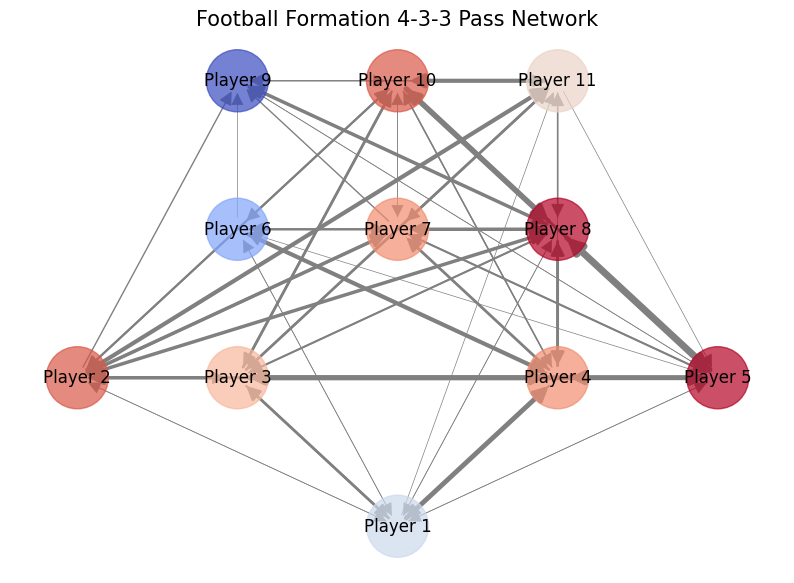

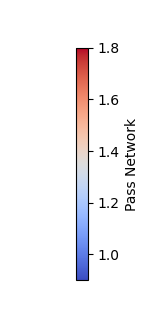

In [5]:
# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Normalize centrality values for coloring
norm = plt.Normalize(vmin=min(degree_centrality.values()), vmax=max(degree_centrality.values()))
colors = [degree_centrality[node] for node in G.nodes()]

# Main plot
plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(G, positions, node_size=2000, cmap=plt.cm.coolwarm, node_color=colors, alpha=0.7)
nx.draw_networkx_edges(G, positions, edgelist=G.edges(), width=[d['weight']/2 for u, v, d in G.edges(data=True)], arrowstyle='-|>', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, positions, font_size=12, font_family="sans-serif")
plt.title('Football Formation 4-3-3 Pass Network', size=15)
plt.axis('off')
plt.show()

# Colorbar
fig, ax = plt.subplots(figsize=(1, 4))
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Pass Network')
ax.axis('off')
plt.show()


Player 1 (Goalkeeper): The node is light grey, indicating a moderate level of interaction, likely involved in play distribution.

Player 2 (Defender): With a red-colored node, this player has a high level of interaction in the dynamic of the game, indicating regular involvement in passing.

Player 3 (Defender): Light peach, indicating regular participation in the game

Player 4 (Defender): The color is slighly darker, indicating this defender is more involved in the passing game.

Player 5 (Defender): Dark red, seams like the key player of the team, the one called to start an action.

Player 6 (Midfielder): This node is a cooler blue, showing less interaction compared to the peach-colored players, which is unusual for a midfielder and may indicate a more specialized or defensive role.

Player 7 (Midfielder): peach, indicating they are involved in passing and likely an important figure in midfield dynamics.

Player 8 (Midfielder): Dark red, suggesting a key role in connecting the defense with the attack.

Player 9 (Forward): The node is blue, indicating this forward has fewer interactions and may either be receiving fewer passes or be more isolated in their role upfront.

Player 10 (Forward): Dark red, showing a very high level of interaction, likely a central player in the team’s offensive plays.

Player 11 (Forward): Grey, suggesting this player is less involved in the team’s attack, possibly as a striker who don't receive a lot of balls.


Eigenvectors Centrality Analysis:

A measure of the influence of a node in a network. It assigns relative scores to all nodes based on the concept that connections to high-scoring nodes contribute more to the score of the node in question.

In [6]:
# We needed to adapt position to the plot to allow a better visualizzation
pos = {
    'Player 1': (0.5, 0.1),  # Goalkeeper
    'Player 2': (0.2, 0.3),  # Left Defender
    'Player 3': (0.35, 0.3),  # Center Left Defender
    'Player 4': (0.65, 0.3),  # Center Right Defender
    'Player 5': (0.8, 0.3),  # Right Defender
    'Player 6': (0.3, 0.5),  # Left Midfielder
    'Player 7': (0.5, 0.5),  # Central Midfielder
    'Player 8': (0.7, 0.5),  # Right Midfielder
    'Player 9': (0.3, 0.7),  # Left Forward
    'Player 10': (0.5, 0.7), # Center Forward
    'Player 11': (0.7, 0.7)  # Right Forward
}

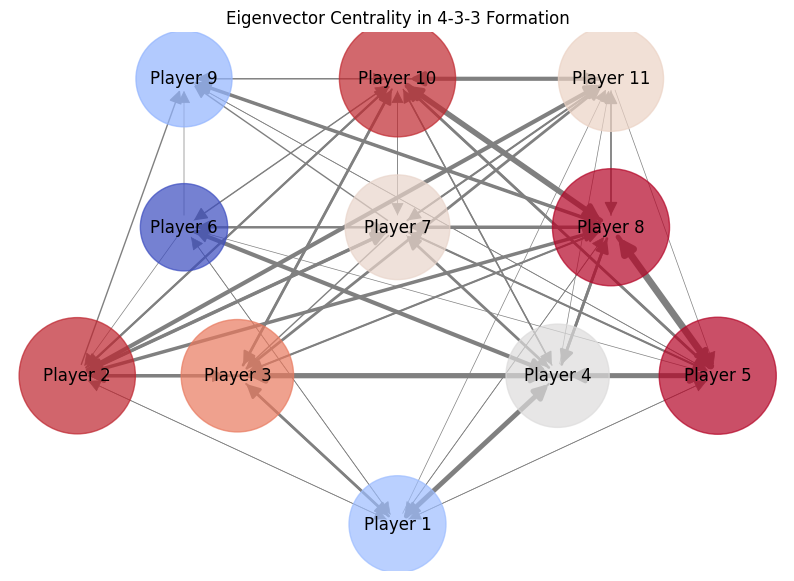

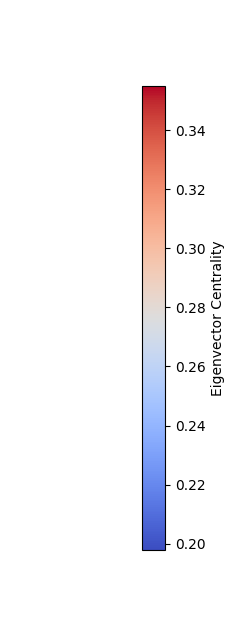

In [7]:

# Calculate the Eigenvector Centrality for each node
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

# Main plot
plt.figure(figsize=(10, 7))
colors = [eigenvector_centrality[node] for node in G.nodes()]
node_sizes = [20000 * v for v in eigenvector_centrality.values()]
norm = plt.Normalize(vmin=min(eigenvector_centrality.values()), vmax=max(eigenvector_centrality.values()))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=colors, cmap=plt.cm.coolwarm, alpha=0.7)
edge_widths = [d['weight'] / 2 for u, v, d in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=edge_widths, arrowstyle='-|>', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
plt.axis('off')
plt.title('Eigenvector Centrality in 4-3-3 Formation')
plt.show()


# Colorbar
fig, ax = plt.subplots(figsize=(2, 8))
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Eigenvector Centrality')
ax.axis('off')
plt.show()


Player 1 (Goalkeeper): Light blue indicates lower influence in the passing network, typical for a goalkeeper.

Player 2 (Defender): Red, showing high influence, which suggests this player is not only active in passing but also interacts with other key players.

Player 3 (Defender): Peach, moderately influential, involved in the network and connected to players who are central to the team's play.

Player 4 (Defender): Light grey, indicating a moderate level of influence, suggesting some involvement with influential teammates.

Player 5 (Defender): Red, highly influential, suggesting significant interaction with other key players, possibly acting as a playmaker from the back.

Player 6 (Midfielder): Light blue, less influential, which is unusual for a midfielder and may suggest a more defensive role or a disconnect from the main pass routes as said before

Player 7 (Midfielder): Grey, moderately influential, not really actively involved in the network, linking up with non influential players.

Player 8 (Midfielder): Dark red, highly influential, indicating a central role in the team's passing network, likely a key playmaker.

Player 9 (Forward): Blue, indicating less influence, which could mean this player is either a finisher at the end of passing chains or is isolated from the play.

Player 10 (Forward): Dark red, very influential, suggesting that this player is central to the team's attacking strategy and frequently involved in plays with other key teammates.

Player 11 (Forward): Light grey, suggesting low influence in the game's dynamic.


Degree Prestige Analysis:

is a measure of a node’s importance based on the number of incoming connections it has in a directed network.
Degree Prestige can indicate a player’s prominence based on how often they receive the ball from teammates.
It's calculated by counting the number of edges directed towards the node and normalizing it by the total number of nodes minus one.

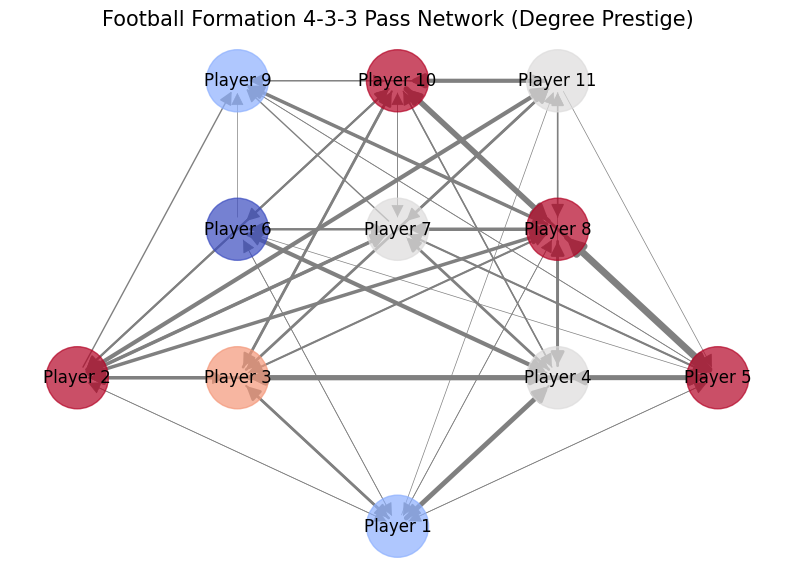

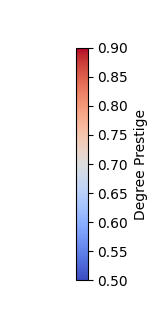

In [8]:
# Calculate Degree Prestige (in-degree centrality)
degree_prestige = nx.in_degree_centrality(G)

# Normalize centrality values for coloring
norm = plt.Normalize(vmin=min(degree_prestige.values()), vmax=max(degree_prestige.values()))
colors = [degree_prestige[node] for node in G.nodes()]

# Main plot
plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(G, positions, node_size=2000, cmap=plt.cm.coolwarm, node_color=colors, alpha=0.7)
nx.draw_networkx_edges(G, positions, edgelist=G.edges(), width=[d['weight']/2 for u, v, d in G.edges(data=True)], arrowstyle='-|>', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, positions, font_size=12, font_family="sans-serif")
plt.title('Football Formation 4-3-3 Pass Network (Degree Prestige)', size=15)
plt.axis('off')
plt.show()

# Colorbar
fig, ax = plt.subplots(figsize=(1, 4))
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Degree Prestige')
ax.axis('off')
plt.show()


Player 1 (Goalkeeper): Blue, suggesting they are less often a target for passes, which aligns with typical goalkeeper play.

Player 2 (Defender): Red, indicating they are frequently a target for passes, showing their importance in play-building from the back.

Player 3 (Defender): Peach, moderately targeted in the network, likely involved in play construction.

Player 4 (Defender): Grey, moderately targeted for passes, which suggests some involvement in ball circulation.

Player 5 (Defender): Red, suggesting they are a frequent pass target, likely active on the flank.

Player 6 (Midfielder): Blue, less targeted for passes, which may suggest a more defensive or less central role.

Player 7 (Midfielder): Light grey, a moderate target for passes, not really involved in the team's passing game.

Player 8 (Midfielder): Red, frequently targeted, indicating a key role in distributing and receiving passes.

Player 9 (Forward): Blue, less targeted, which may suggest a specialized role like stretching defenses or waiting for key passes.

Player 10 (Forward): Red, a primary target for passes, likely indicating a central attacking role.

Player 11 (Forward): Light grey, suggesting a non pivotal role in the team's offensive tactics.


PageRank Prestige Analysis:

This concept is used to determine the ‘popularity’ or importance of players in a team, based on the principle that a player is popular if they receive passes from other popular players.

Calculation Method: It assigns to each player a probability that they will have the ball after a number of passes, using a recursive algorithm.

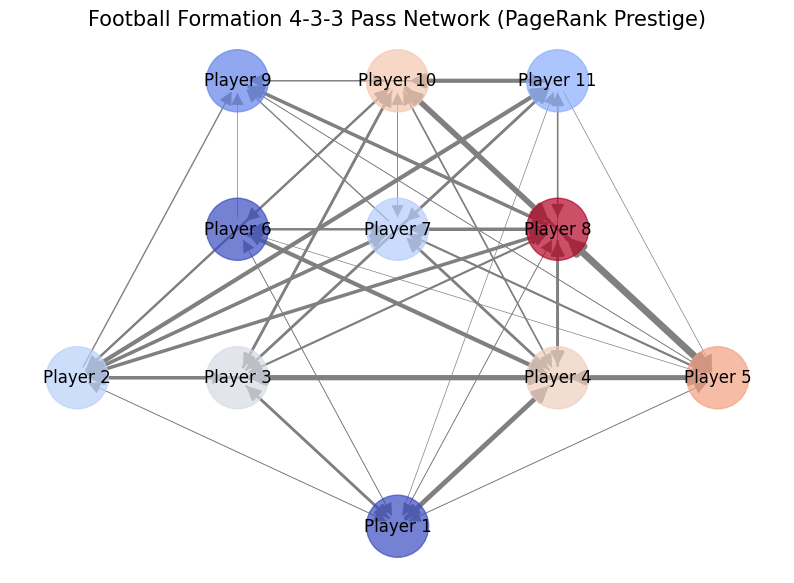

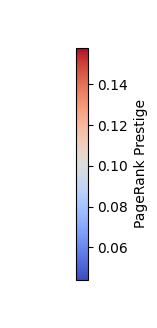

In [9]:
# Calculate PageRank Prestige
pagerank_prestige = nx.pagerank(G, alpha=0.85)  # alpha is the damping factor commonly set to 0.85

# Normalize centrality values for coloring
norm = plt.Normalize(vmin=min(pagerank_prestige.values()), vmax=max(pagerank_prestige.values()))
colors = [pagerank_prestige[node] for node in G.nodes()]

# Main plot
plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(G, positions, node_size=2000, cmap=plt.cm.coolwarm, node_color=colors, alpha=0.7)
nx.draw_networkx_edges(G, positions, edgelist=G.edges(), width=[d['weight']/2 for u, v, d in G.edges(data=True)], arrowstyle='-|>', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, positions, font_size=12, font_family="sans-serif")
plt.title('Football Formation 4-3-3 Pass Network (PageRank Prestige)', size=15)
plt.axis('off')
plt.show()

# Colorbar
fig, ax = plt.subplots(figsize=(1, 4))
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('PageRank Prestige')
ax.axis('off')
plt.show()


Player 1 (Goalkeeper): Blue, lower PageRank prestige, indicating fewer interactions.

Player 2 (Defender): Light blue, also low PageRank prestige, suggesting less involvement in key playmaking.

Player 3 (Defender): Light blue, similar to Player 2, less influential in the pass network.

Player 4 (Defender): Peach, moderately influential, indicating a role in play-building from the back.

Player 5 (Defender): Darker Peach, suggesting a more important level of importance in the network.

Player 6 (Midfielder): Blue, less PageRank prestige, which is unusual for a midfielder, indicating a limited role in the network.

Player 7 (Midfielder): Light Blue, also with a low score, possibly indicating a defensive or specialized role with fewer key passes.

Player 8 (Midfielder): Dark red, high PageRank prestige, likely to be a key player in the midfield with significant influence on the game's flow.

Player 9 (Forward): Light blue, lower PageRank prestige, which could indicate a more isolated role or a specialization in finishing rather than in playmaking.

Player 10 (Forward): Peach, moderately influential, which suggests involvement in crucial plays, likely a target for key passes.

Player 11 (Forward): Light blue, indicative of a lowly influential role in attack, not frequently involved in significant plays.

 Macro-level Analysis

In [10]:
# 1. EV Team - Largest eigenvalue of the graph's adjacency matrix
largest_eigenvalue = max(np.linalg.eigvals(nx.adjacency_matrix(G).toarray()).real)
print("Largest Eigenvalue (EV Team):", largest_eigenvalue)

# 2. Density of the Team
density = nx.density(G)
print("Density of the team:", density)

# 3. Clustering Coefficient
# For directed graphs, it's often useful to consider the graph as undirected for clustering calculations
clustering_coefficient = nx.average_clustering(G.to_undirected())
print("Clustering Coefficient:", clustering_coefficient)


Largest Eigenvalue (EV Team): 25.92181754296436
Density of the team: 0.7454545454545455
Clustering Coefficient: 0.859090909090909


Largest Eigenvalue (EV Team): 

The largest eigenvalue of a network's adjacency matrix is often related to the network's connectivity. In the context of a team's pass network, a high largest eigenvalue (25.92 in this case) can suggest that the team has a strong overall connectivity. This implies that passes are well-distributed among players, and the team likely exhibits good coordination and combination play.

Density of the team: 

The density of a network is the proportion of potential connections in a network that are actual connections. A density value of 0.745 is quite high, suggesting that there are many connections among the team members compared to the number of possible connections. This indicates a playing style with lots of passing and interaction between players, which can be seen in possession-based teams that emphasize short passes and maintaining control of the ball.

Clustering Coefficient:

 This metric measures the degree to which nodes in a network tend to cluster together. A high clustering coefficient (0.859) means that the players tend to form tightly knit groups where each player is likely to be connected to many other players within the group. This often results in robust passing options and backups, which is characteristic of teams that have good understanding and chemistry on the field.

In [11]:
Metrics_First_Half = all_sheets['Metrics_First_Half']  
Metrics_First_Half = Metrics_First_Half.drop('Nome', axis=1) 
print(Metrics_First_Half)

           N°  Degree centrality  degree prestige  page rank  eigen vector  \
0    Player 1                NaN              NaN        NaN           NaN   
1    Player 2                NaN              NaN        NaN           NaN   
2    Player 3                NaN              NaN        NaN           NaN   
3    Player 4                NaN              NaN        NaN           NaN   
4    Player 5                NaN              NaN        NaN           NaN   
5    Player 6                NaN              NaN        NaN           NaN   
6    Player 7                NaN              NaN        NaN           NaN   
7    Player 8                NaN              NaN        NaN           NaN   
8    Player 9                NaN              NaN        NaN           NaN   
9   Player 10                NaN              NaN        NaN           NaN   
10  Player 11                NaN              NaN        NaN           NaN   

    EV team  density of the team  clustering coefficient  
0   

First Half Metric Table

In [12]:
Metrics_First_Half['Degree centrality'] = Metrics_First_Half['N°'].map(degree_centrality)
Metrics_First_Half['degree prestige'] = Metrics_First_Half['N°'].map(degree_prestige)
Metrics_First_Half['page rank'] = Metrics_First_Half['N°'].map(pagerank_prestige)
Metrics_First_Half['eigen vector'] = Metrics_First_Half['N°'].map(eigenvector_centrality)
#Since from now on this metrics are single values representative of the entire Network, and not specific to each player, for simplicity we are just gonna assign the same value to each row of the df
Metrics_First_Half['EV team'] = largest_eigenvalue
Metrics_First_Half['density of the team'] = density
Metrics_First_Half['clustering coefficient'] = clustering_coefficient

Metrics_First_Half

,N°,Degree centrality,degree prestige,page rank,eigen vector,EV team,density of the team,clustering coefficient
0,Player 1,1.3,0.6,0.043858,0.243829,25.921818,0.745455,0.859091
1,Player 2,1.7,0.9,0.086933,0.350380,25.921818,0.745455,0.859091
2,Player 3,1.5,0.8,0.098136,0.327502,25.921818,0.745455,0.859091
3,Player 4,1.6,0.7,0.110630,0.276673,25.921818,0.745455,0.859091
4,Player 5,1.8,0.9,0.127421,0.355217,25.921818,0.745455,0.859091
5,Player 6,1.1,0.5,0.044128,0.197646,25.921818,0.745455,0.859091
6,Player 7,1.6,0.7,0.085668,0.284247,25.921818,0.745455,0.859091
7,Player 8,1.8,0.9,0.157980,0.355217,25.921818,0.745455,0.859091
8,Player 9,0.9,0.6,0.058940,0.239438,25.921818,0.745455,0.859091
9,Player 10,1.7,0.9,0.114428,0.349872,25.921818,0.745455,0.859091
